<a href="https://colab.research.google.com/github/dakrworld/Math-152/blob/main/Exploration_2_(part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

For the first part of our exploration, we analyze the basins of attraction of the following function (call it f):

In [ ]:
x**3+1*x**2-2*x

As was explained in the rubric, Newton's method is applicable to many different kinds of functions. We choose the above function because its behavior is relatively straightforward: it is a cubic polynomial with three real roots. If we were to pick a more complicated function, such as an exponential function or a polynomial of a higher degree, our code could get quite mess, so this is a good choice. 

We start by clarifying what we mean by basins of attraction. If f is a function and r one of its roots, the basin of attraction for r is the set of complex numbers z for which Newton's method converges to r. More precisely, if z is in the basin of attraction for r, the sequence with first term z generated by Newton's method converges to r. 

In light of this, a good initial step is to model Newton's method. Consider the following function:

In [12]:
def newton(x):
  j=0
  while x!=1 and x!=0 and x!=-2:
    x=x-((x**3+1*x**2-2*x)/(3*x**2+2*x-2))
  return x  

In [15]:
newton(0)

0

It takes a complex number x as its input, and returns the root that the associated sequence generated by Newton's method (which we will, for ease, refer to as Newton's sequence from this point forward) converges to.

With this function, we can determine the root associated with every point in the complex plane. This means the basins of attraction of our functions are within our grasp. 

We can't, however, look at every complex number, for there are infinitely many. Thus, we will have to restrict our attention to a subset of the complex plane. First, though, we should explain in greater detail the approach we plan on taking. 

We seek to identify the basins of attraction within a subset of the complex plain. To illustrate their locations, we can use color coding: We will generate a plot of a subset of the complex plane. The points associated with the roots 1,0, and -2 will be colored red, green, and blue, respectively. A basin of attraction for a root is, as we explained earlier, the set of points associated with that root. In our case, the set of points associated with a root will be the same color. Thus, our basins of attraction will simply be the red, green, and blue patches that will appear. 

To generate this illustration, we create a 1400x1400x3 matrix of zeros. This can be thought of as a 1400x1400 matrix of 3-tuples. The 3-tuples represent color (pixels). To the elements of the matrix with x or y coordinate less than 200 or more than 1200, we set the values of the 3-tuples to 255,255,255, giving them a white color. The others will be assigned red, green, or blue. These points will constitute our complex plane. 

Now, we don't want just any array of complex numbers. We want the 1000x1000 square of complex numbers centered at the origin. Lines 12 through 21 show how we achieve this. Basically, we algebraically relate each point in our array to the point in the complex plane that we want it to represent, and then plug that point into our Newton's method function. This gives us the root the sequence converges to, and therefore the color the point will be assigned to. We can then set the values of the 3-tuple accordingly. All of this is recorded.

Then, we use some software to convert these pixels into their associated colors. And to top things off, we create a rudimentary coordinate axis (the black marks) to emphasize that we're centered at the origin of the complex plane. 



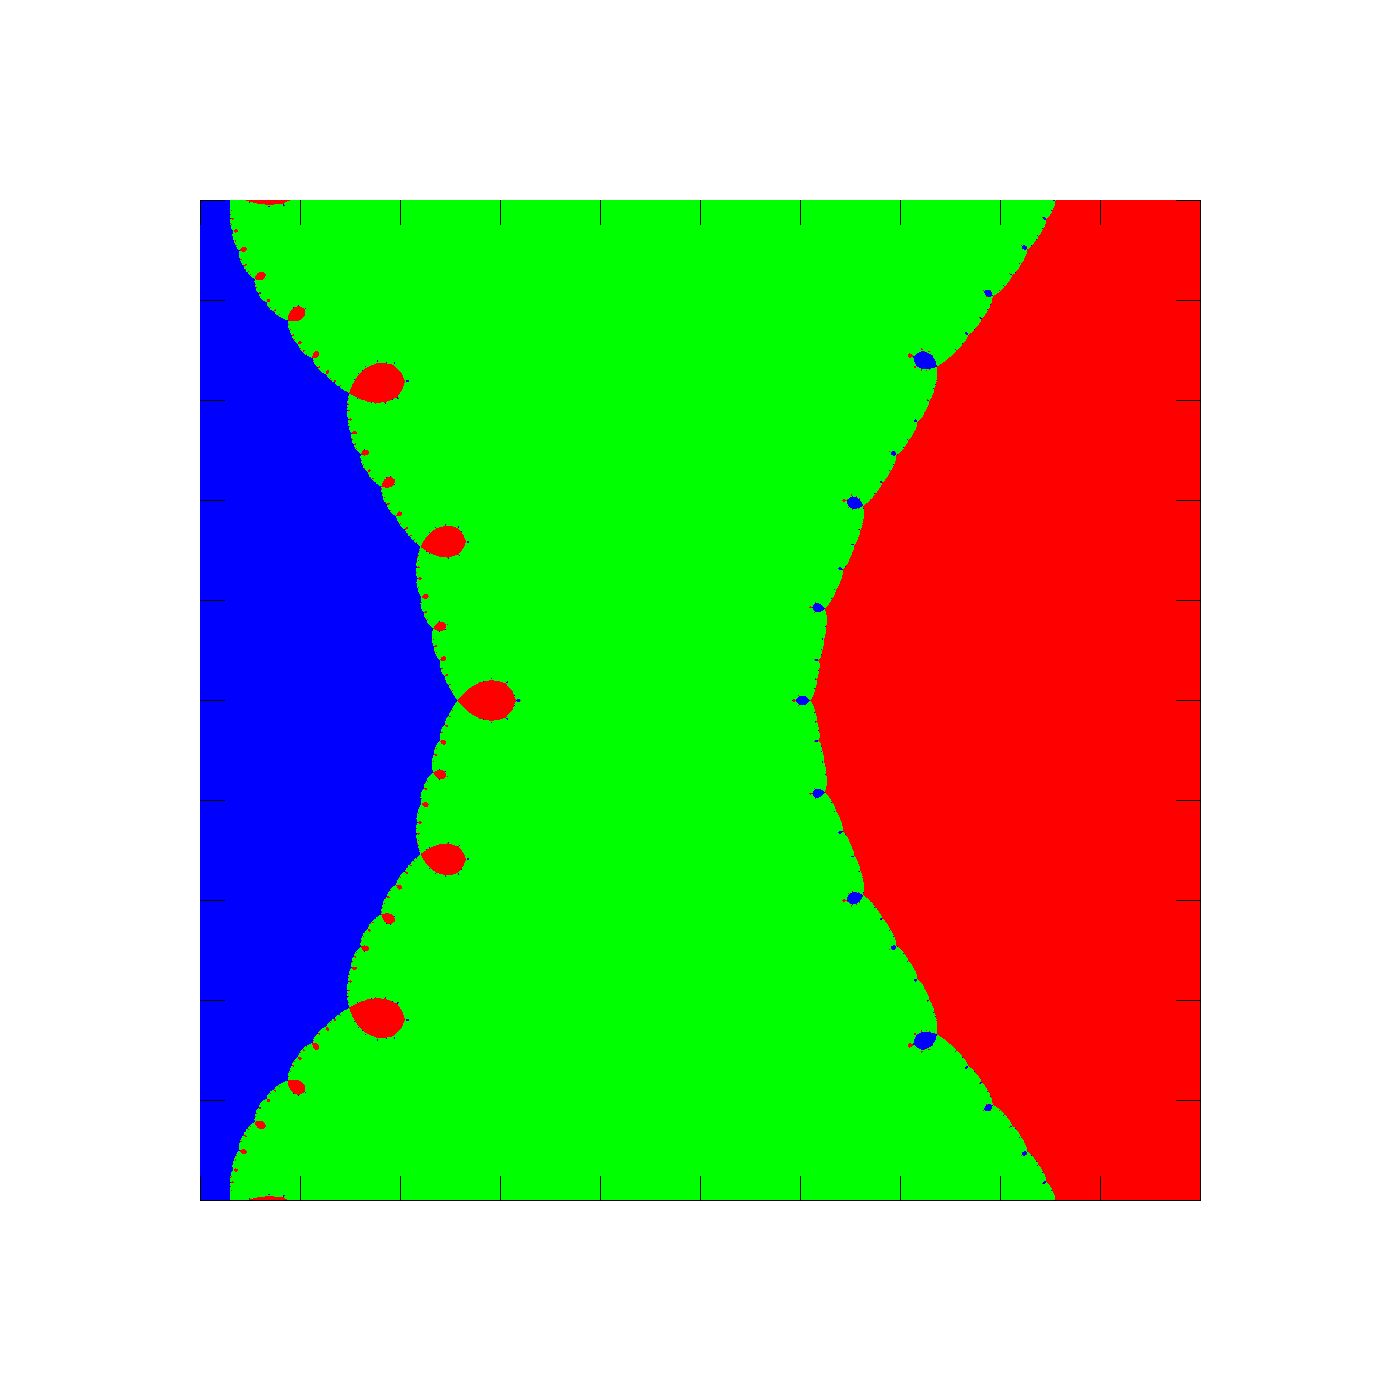

In [13]:
gradient = np.zeros((1400, 1400,3), dtype=np.uint8)
for x in range(1400):
  for y in range(1400):
    gradient[x,y]=[255,255,255]

for t in range(1000):
  gradient[200,1200-t]=[0,0,0]
  gradient[1200-t,200]=[0,0,0]
  gradient[1200-t,1200]=[0,0,0]
  gradient[1200,1200-t]=[0,0,0]  

for x in range(200,1200):
  for y in range(200,1200):
    if newton((x-700)/200+(y-700)/200*1j)==1+0j:
      gradient[y,x]=[255,0,0]
    else:
      if newton((x-700)/200+(y-700)/200*1j)==0j:
        gradient[y,x]=[0,255,0] 
      else:
        if newton((x-700)/200+(y-700)/200*1j)==-2+0j:
          gradient[y,x]=[0,0,255]

for s in range(200,1201,100):
  for h in range(200,225):
    gradient[s,h]=[0,0,0]
    gradient[h,s]=[0,0,0]  
    gradient[s,1400-h]=[0,0,0]
    gradient[1400-h,s]=[0,0,0]          

img = Image.fromarray(gradient) 
display(img)

The results of this are rather bizzare. On the boundaries of large, homogenous regions of points that all converge to the same root, we get fractal-like regions of points that converge to different roots. Assuming they are true fractals, we conclude that points that convergence to different roots can be found adjacent to one another at all scales: zoom in on a fractal, you'll see regions of red and blue next to each other; zoom in even further, and you'll see the same. 